In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd


In [10]:
train = pd.read_csv('data/train.csv')

In [41]:
numeric = train.select_dtypes(np.number).columns.tolist()

In [42]:
train[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

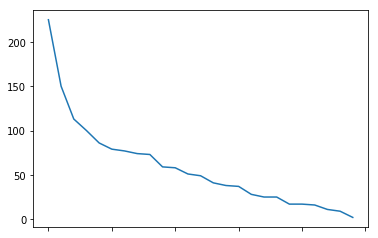

In [49]:
train['Neighborhood'].value_counts().plot()

In [50]:
train['Neighborhood_cat'] = pd.factorize(train['Neighborhood'])[0]
train['Neighborhood_cat']

0        0
1        1
2        0
3        2
4        3
5        4
6        5
7        6
8        7
9        8
10       9
11      10
12       9
13       0
14      11
15       8
16      11
17       9
18      12
19      11
20      10
21      13
22       0
23      14
24       9
25      10
26      11
27      10
28      11
29       8
        ..
1430    17
1431    20
1432     7
1433    17
1434     4
1435    11
1436    11
1437    10
1438     7
1439     6
1440     2
1441     0
1442     5
1443     8
1444     0
1445     9
1446     4
1447     0
1448    15
1449    14
1450    11
1451     5
1452    15
1453     4
1454     5
1455    17
1456     6
1457     2
1458    11
1459    15
Name: Neighborhood_cat, Length: 1460, dtype: int64

In [32]:
pearsonr(train.SalePrice,train.LotArea)

(0.2638433538714056, 1.1231391549187896e-24)

In [62]:
cols = ['SalePrice', 'LotArea', 'YearBuilt', 'OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1','GarageCars']
train[cols].head()
results = np.array([np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols)),np.arange(len(cols))],dtype=float)
results
for i in range(len(results)):
    for j in range(len(cols)):
        results[i,j] = np.round(pearsonr(train[cols[i]],train[cols[j]])[0],2)
        print(results[i,j])
results

1.0
0.26
0.52
0.79
0.71
0.61
0.39
0.64
0.26
1.0
0.01
0.11
0.26
0.26
0.21
0.15
0.52
0.01
1.0
0.57
0.2
0.39
0.25
0.54
0.79
0.11
0.57
1.0
0.59
0.54
0.24
0.6
0.71
0.26
0.2
0.59
1.0
0.45
0.21
0.47
0.61
0.26
0.39
0.54
0.45
1.0
0.52
0.43
0.39
0.21
0.25
0.24
0.21
0.52
1.0
0.22
0.64
0.15
0.54
0.6
0.47
0.43
0.22
1.0


array([[1.  , 0.26, 0.52, 0.79, 0.71, 0.61, 0.39, 0.64],
       [0.26, 1.  , 0.01, 0.11, 0.26, 0.26, 0.21, 0.15],
       [0.52, 0.01, 1.  , 0.57, 0.2 , 0.39, 0.25, 0.54],
       [0.79, 0.11, 0.57, 1.  , 0.59, 0.54, 0.24, 0.6 ],
       [0.71, 0.26, 0.2 , 0.59, 1.  , 0.45, 0.21, 0.47],
       [0.61, 0.26, 0.39, 0.54, 0.45, 1.  , 0.52, 0.43],
       [0.39, 0.21, 0.25, 0.24, 0.21, 0.52, 1.  , 0.22],
       [0.64, 0.15, 0.54, 0.6 , 0.47, 0.43, 0.22, 1.  ]])

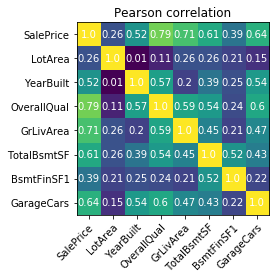

In [63]:

fig, ax = plt.subplots()
im = ax.imshow(results)
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, results[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson correlation")
fig.tight_layout()
plt.show()
